In [167]:
from __future__ import print_function  # used for making Python 2 print function act like python3 function

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import path
%matplotlib inline

# Stroop Data Analysis in Pandas (Answer Sheet)

## 1. Load Data into a Pandas DataFrame

In [7]:
ls *.csv

StroopData.csv


In [16]:
df = pd.read_csv('StroopData.csv')
df.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time
0,Y,Y,1.0,156772.0,Y,1389.0
1,G,G,2.0,156772.0,G,2043.0
2,R,R,3.0,156772.0,R,1389.0
3,Y,Y,4.0,156772.0,Y,1092.0
4,G,G,5.0,156772.0,G,1310.0


## 2.1 How Many Trials were there in total, across all subjects?

In [17]:
len(df)

2803

## 2.2 What was the Maximum number of trials any subject did? The minimum?

In [166]:
df.groupby('subject').trialnum.count().head()

subject
156772.0    90
156839.0    90
156856.0    90
156857.0    89
156858.0    89
Name: trialnum, dtype: int64

In [23]:
df.groupby('subject').trialnum.count().max()

90

In [24]:
df.groupby('subject').trialnum.count().min()

85

## How Many subjects were there in this study?

In [26]:
len(pd.unique(df['subject']))

32

In [27]:
len(df.groupby('subject'))

32

In [29]:
df['subject'].astype(str).describe()

count         2803
unique          32
top       156839.0
freq            90
Name: subject, dtype: object

## What is the mean response Time, across all subjects and conditions?

In [30]:
df['reaction_time'].mean()

1703.5362112022833

In [31]:
df.reaction_time.mean()

1703.5362112022833

## Plot a histogram of the response times

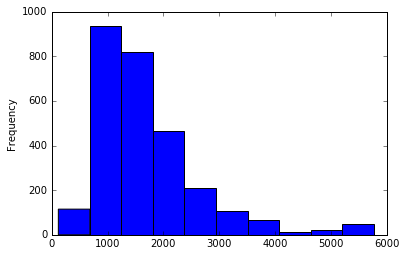

In [32]:
df.reaction_time.plot.hist()

(array([ 115.,  937.,  818.,  466.,  208.,  108.,   67.,   14.,   21.,   49.]),
 array([  119. ,   684.1,  1249.2,  1814.3,  2379.4,  2944.5,  3509.6,
         4074.7,  4639.8,  5204.9,  5770. ]),
 <a list of 10 Patch objects>)

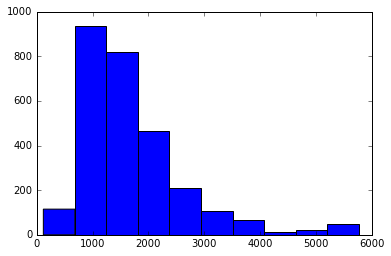

In [33]:
plt.hist(df.reaction_time)

## Log transform the reaction Times

In [38]:
df['reaction_time_logged'] = np.log(df['reaction_time'])
df.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,reaction_time_logged
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339
1,G,G,2.0,156772.0,G,2043.0,7.622175
2,R,R,3.0,156772.0,R,1389.0,7.236339
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766
4,G,G,5.0,156772.0,G,1310.0,7.177782


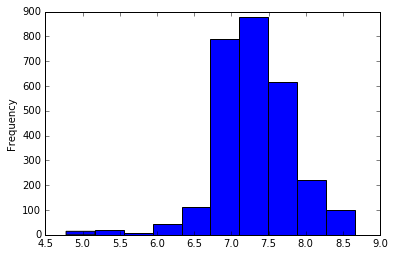

In [37]:
df.reaction_time_logged.plot.hist()

## Reject Bad Data

In [45]:
df_good = df[df['reaction_time_logged'] > 5.7]
print('Old Data Length:', len(df))
print('New Data Length:', len(df_good))
df_good.head()

Old Data Length: 2803
New Data Length: 2766


,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,reaction_time_logged
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339
1,G,G,2.0,156772.0,G,2043.0,7.622175
2,R,R,3.0,156772.0,R,1389.0,7.236339
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766
4,G,G,5.0,156772.0,G,1310.0,7.177782


In [46]:
df_good = df.loc[df.reaction_time_logged > 5.7]
print('Old Data Length:', len(df))
print('New Data Length:', len(df_good))

Old Data Length: 2803
New Data Length: 2766


From here on, use the rejected data!

## Overall, what was the accuracy of the responses?

  - How many trials, in total, were correct (stimcolor matched respcolor)?
  - How many trials were incorrect?
  - What percent accuract was there, overall?

### Correct

In [48]:
np.sum(df_good.stimcolor == df_good.respcolor)

2684

In [49]:
(df_good.stimcolor == df_good.respcolor).sum()

2684

In [51]:
is_correct = df_good.stimcolor == df_good.respcolor
is_correct.sum()

2684

### Percent Accuracy

In [52]:
is_correct = df_good.stimcolor == df_good.respcolor
is_correct.mean()

0.97035430224150399

## Matched vs Unmatched Colors

 - What weas the mean log response time for Congruent trials (the stimulus word and color matched each other)?
 - What was the mean log response time for Incongruent trials (when the stimulus word and color did not match each other)?

In [56]:
is_congruent = df_good.stimcolor == df_good.stimword
df_good.reaction_time_logged[is_congruent].mean()

7.0560867512805396

In [58]:
df_good.reaction_time_logged[is_congruent == False].mean()

7.6270282053908902

## Make a Bar Graph of Mean Log Response Time

### Strategy 1: GroupBy column

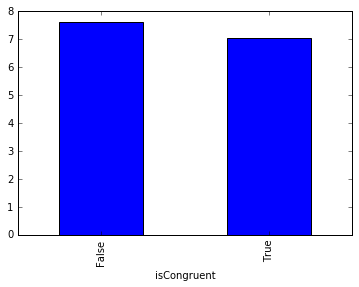

In [70]:
df_good.loc[:, 'isCongruent'] = is_congruent
congruent_groups = df_good.groupby('isCongruent')
mean_resptime_by_congruent = congruent_groups['reaction_time_logged'].mean()
mean_resptime_by_congruent.plot.bar()

### Note on Making Columns: Better to use labels, in the long run (great for plotting)

In [134]:
df_good.loc[:, 'Condition'] = ['Congruent' if el else 'Incongruent' for el in is_congruent]
df_good.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,reaction_time_logged,isCongruent,Condition
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339,True,Congruent
1,G,G,2.0,156772.0,G,2043.0,7.622175,True,Congruent
2,R,R,3.0,156772.0,R,1389.0,7.236339,True,Congruent
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766,True,Congruent
4,G,G,5.0,156772.0,G,1310.0,7.177782,True,Congruent


### Strategy 2: Groupby array

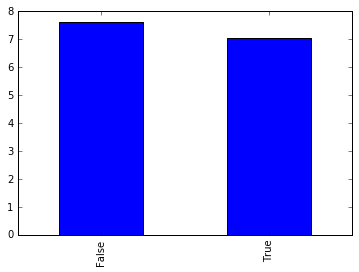

In [71]:
congruent_groups = df_good.groupby(is_congruent)
mean_resptime_by_congruent = congruent_groups['reaction_time_logged'].mean()
mean_resptime_by_congruent.plot.bar()

### Strategy 3: Let Seaborn do it

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


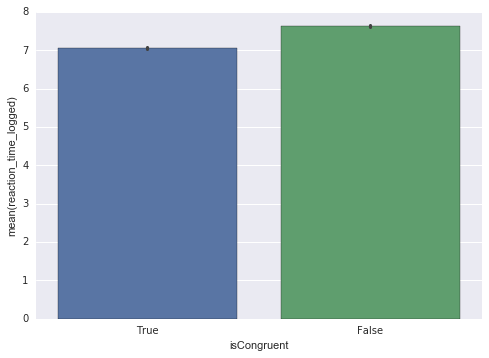

In [73]:
import seaborn as sns
df_good.loc[:, 'isCongruent'] = is_congruent
sns.barplot(x='isCongruent', y='reaction_time_logged', data=df_good)

### Same plot, but the original reaction time

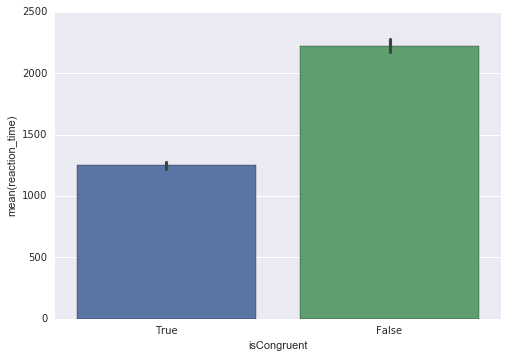

In [74]:
sns.barplot(x='isCongruent', y='reaction_time', data=df_good)

## Change in Performance over Time

### How did reaction time change over the course of each subject's session?

In [77]:
df_good.columns

Index([u'respcolor', u'stimcolor', u'trialnum', u'subject', u'stimword',
       u'reaction_time', u'reaction_time_logged'],
      dtype='object')

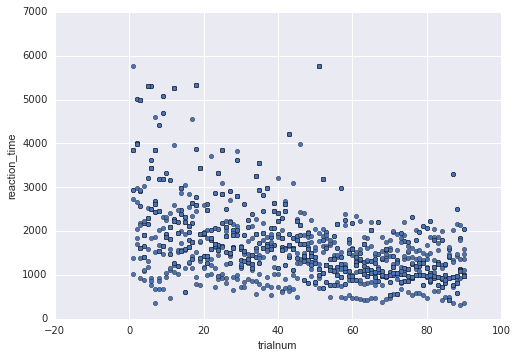

In [83]:
df_good.plot.scatter(x='trialnum', y='reaction_time')

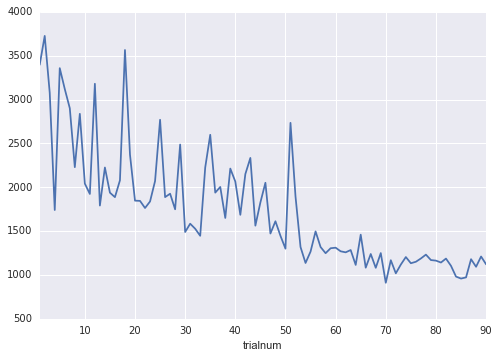

In [84]:
df_good.groupby('trialnum').reaction_time.mean().plot()

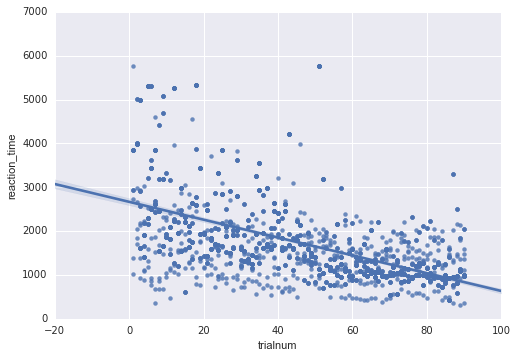

In [89]:
sns.regplot(x='trialnum', y='reaction_time', data=df_good)

## Do all subjects show a difference in response time between the Congruent and Incogruent conditions, or is this just coming from a few subjects?

Plot a histogram of the difference in mean log reaction times between conditions for each subject.  What do you think, should anyone be rejected?

### Strategy 1: Index into 2 Groups

In [117]:
cong = df_good[is_congruent]
incong = df_good[is_congruent == False]
cong_rt_mean = cong.groupby('subject').reaction_time_logged.mean()
incong_rt_mean = incong.groupby('subject').reaction_time_logged.mean()
incong_rt_mean.head()

subject
156772.0    7.351251
156839.0    6.932530
156856.0    7.014764
156857.0    7.524600
156858.0    7.524600
Name: reaction_time_logged, dtype: float64

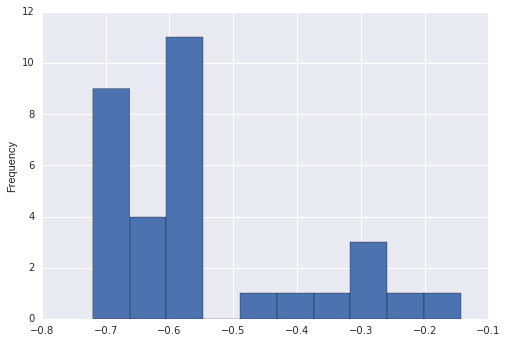

In [118]:
(cong_rt_mean - incong_rt_mean).plot.hist()

### Strategy 2: Multiple Groupby, then Pivot

In [144]:
dd = df_good.groupby(('subject', 'Condition')).reaction_time_logged.mean()
dd.head()

subject   Condition  
156772.0  Congruent      6.971163
          Incongruent    7.351251
156839.0  Congruent      6.455973
          Incongruent    6.932530
156856.0  Congruent      6.871654
Name: reaction_time_logged, dtype: float64

In [145]:
dd.unstack().head()

Condition,Congruent,Incongruent
subject,,
156772.0,6.971163,7.351251
156839.0,6.455973,6.932530
156856.0,6.871654,7.014764
156857.0,6.897377,7.524600
156858.0,6.897377,7.524600


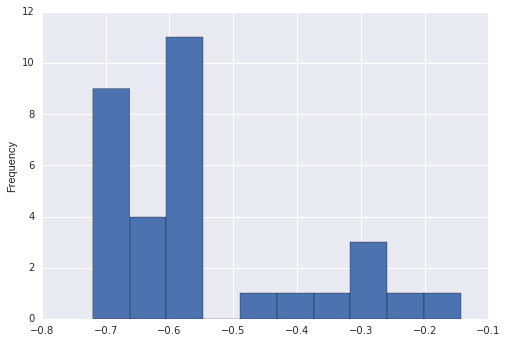

In [146]:
ddu = dd.unstack()
(ddu['Congruent'] - ddu['Incongruent']).plot.hist()

## Plot the mean reaction times for each condition, for each subject.

### Strategy 1: Groupby Multiple

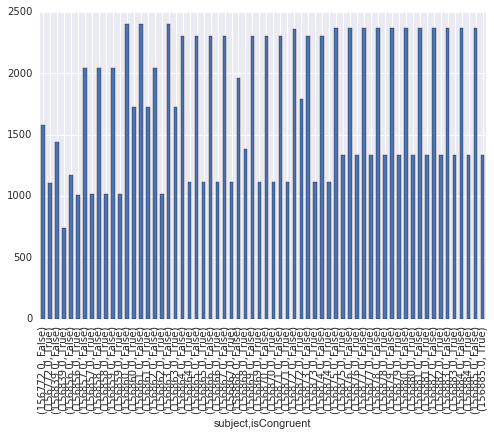

In [95]:
df_good.groupby(('subject', 'isCongruent')).reaction_time.mean().plot.bar()

### Strategy 1b: For-loop over groupby

In [98]:
for subject, subject_df in df_good.groupby('subject'):
    mean_rt = subject_df.groupby('isCongruent').reaction_time.mean()
    print('Subject {}: Congruent={}, Incongruent={}'.format(subject, mean_rt[True], mean_rt[False]))

Subject 156772.0: Congruent=1104.13333333, Incongruent=1574.55555556
Subject 156839.0: Congruent=736.139534884, Incongruent=1442.36363636
Subject 156856.0: Congruent=1010.2, Incongruent=1171.04545455
Subject 156857.0: Congruent=1015.57777778, Incongruent=2043.93181818
Subject 156858.0: Congruent=1015.57777778, Incongruent=2043.93181818
Subject 156859.0: Congruent=1015.57777778, Incongruent=2043.93181818
Subject 156860.0: Congruent=1727.37777778, Incongruent=2404.90697674
Subject 156861.0: Congruent=1727.37777778, Incongruent=2404.90697674
Subject 156862.0: Congruent=1015.57777778, Incongruent=2043.93181818
Subject 156863.0: Congruent=1727.37777778, Incongruent=2404.90697674
Subject 156864.0: Congruent=1112.88888889, Incongruent=2302.20454545
Subject 156865.0: Congruent=1112.88888889, Incongruent=2302.20454545
Subject 156866.0: Congruent=1112.88888889, Incongruent=2302.20454545
Subject 156867.0: Congruent=1112.88888889, Incongruent=2302.20454545
Subject 156868.0: Congruent=1386.42222222

### Strategy 2: Seaborn FacetGrid

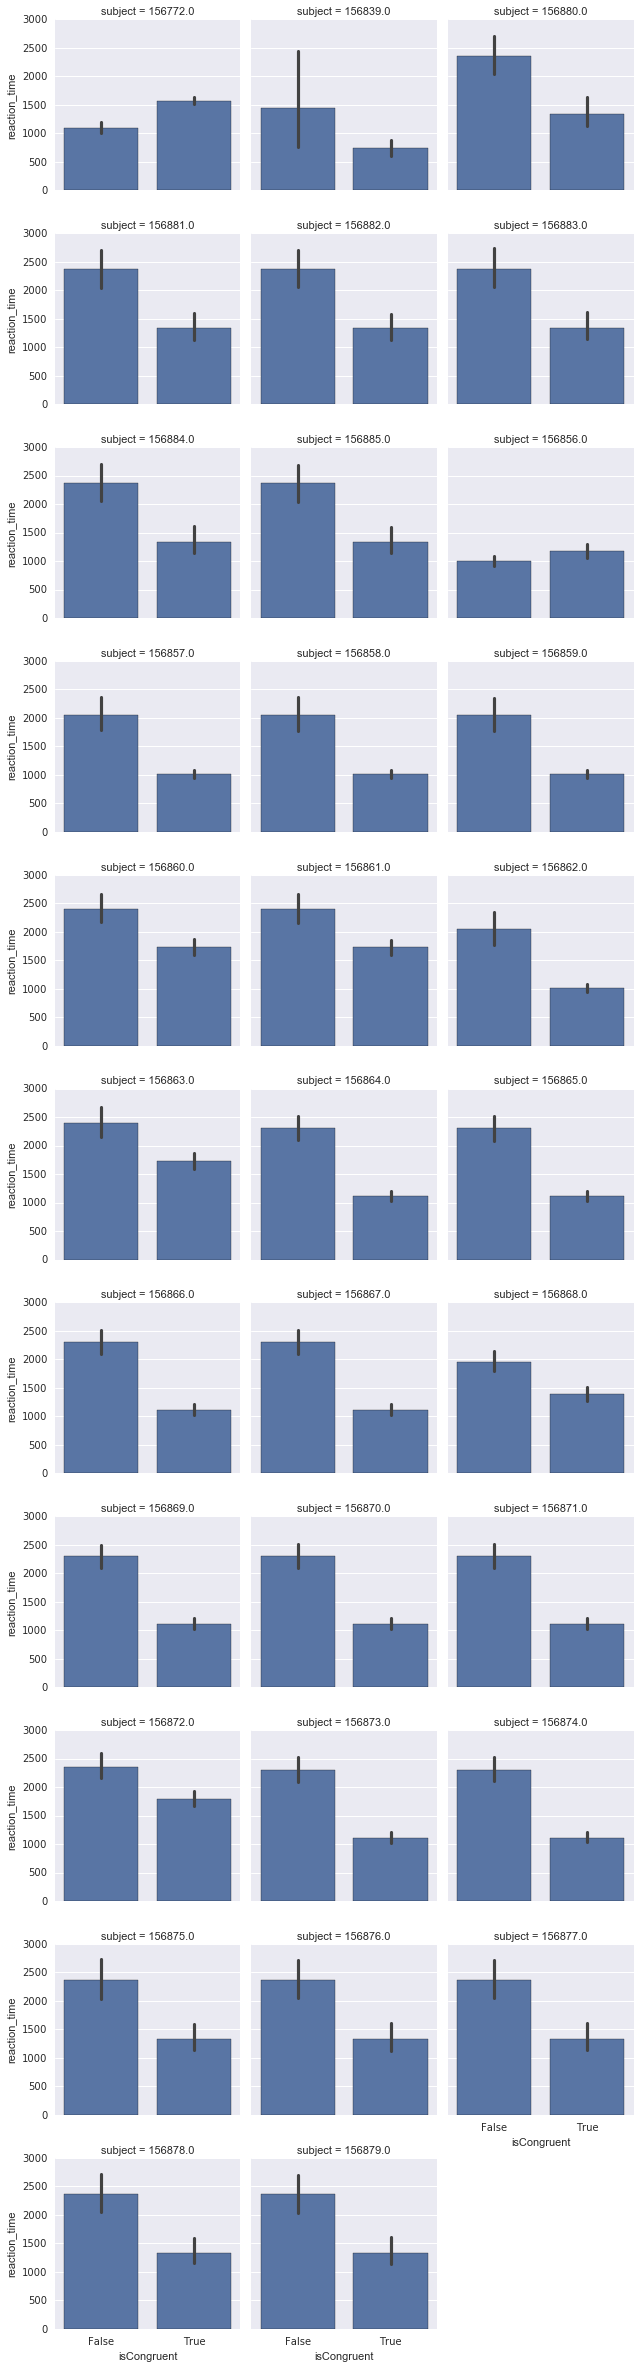

In [99]:
grid = sns.FacetGrid(col='subject', col_wrap=3, data=df_good)
grid.map(sns.barplot, 'isCongruent', 'reaction_time')

## Participant Response Speed vs Size of Stroop Effect
Make a scatter plot showing the relationship between how quickly subjects responded for congruent and incongruent stimuli (mean response to each stimulus category)!

### Strategy 1: Split data with Logical Indexing, Mean with Groupby, the Matplotlib plot each array

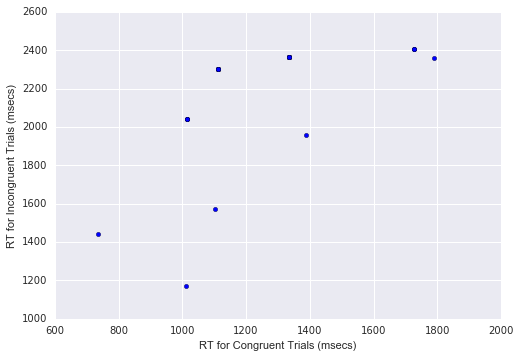

In [128]:
cong = df_good[is_congruent].groupby('subject').reaction_time.mean()
incong = df_good[is_congruent == False].groupby('subject').reaction_time.mean()
plt.scatter(cong, incong)
plt.xlabel('RT for Congruent Trials (msecs)')
plt.ylabel('RT for Incongruent Trials (msecs)')

### Strategy 2: Multiple Groupby, unstack, and Plot

In [139]:
dd = df_good.groupby(('subject', 'Condition')).reaction_time.mean().unstack()
dd.head()

Condition,Congruent,Incongruent
subject,,
156772.0,1104.133333,1574.555556
156839.0,736.139535,1442.363636
156856.0,1010.200000,1171.045455
156857.0,1015.577778,2043.931818
156858.0,1015.577778,2043.931818


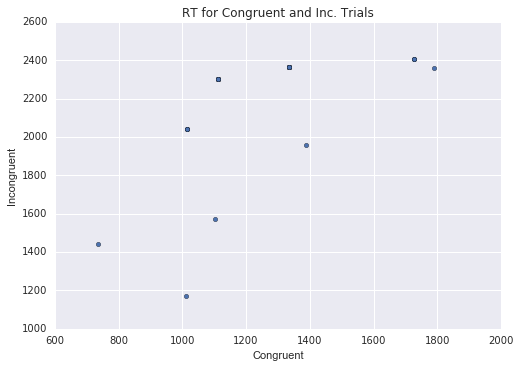

In [142]:
dd.plot.scatter(x='Congruent', y='Incongruent', title='RT for Congruent and Inc. Trials')

## Note: Dot-Chaining in Pandas

It's really tempting to chain together lots of steps in a single line with Pandas, but this can result in code that is difficult to read or debug.  To strategies are useful for avoiding this problem:

  - breaking up lines into multiple steps, with intermediate variables
  - using parentheses to force python to treat multiple lines as a single line

In [150]:
df.loc[:, 'Condition'] = ['Congruent' if el else 'Incongruent' for el in df['stimcolor'] == df['stimword']]

### Strategy 1: Breaking up multiple lines
This line is too long:

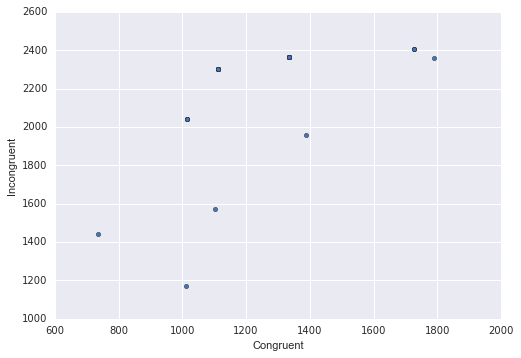

In [152]:
df[df.reaction_time_logged > 5.7].groupby(('subject', 'Condition')).reaction_time.mean().unstack().plot.scatter(x='Congruent', y='Incongruent')

Same thing, broken into multiple steps:

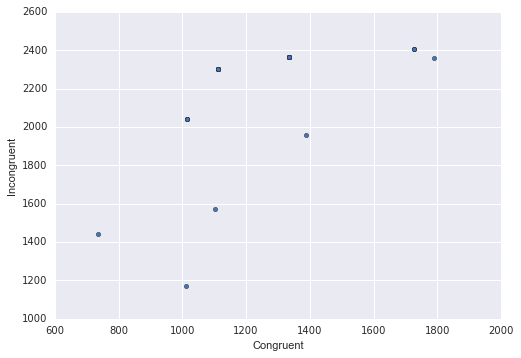

In [155]:
df_good = df[df.reaction_time_logged > 5.7]
conds = df_good.groupby(('subject', 'Condition'))
rt_by_cond = conds['reaction_time'].mean().unstack()
rt_by_cond.plot.scatter(x='Congruent', y='Incongruent')

### Strategy 2: Multiple-line dot-chaining

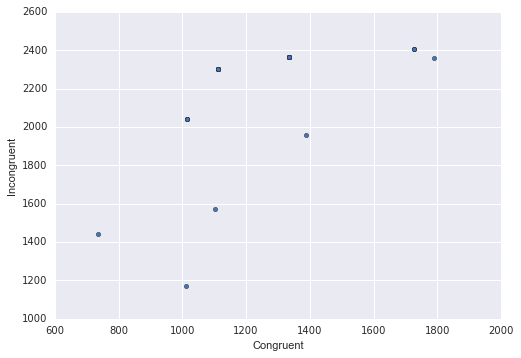

In [157]:
df[df.reaction_time_logged > 5.7] \
 .groupby(('subject', 'Condition')) \
 .reaction_time.mean().unstack() \
 .plot.scatter(x='Congruent', y='Incongruent')